# NYC Citi Bike Trip Project 

In this project, we will explore Citi Bike, New York City's bike share system, released public data from July 2013 through March 2018. For simplicity, we mainly focus on date between Jan 1, 2015 to Dec 31, 2015. We download data 201501-201512 from [here](https://www.citibikenyc.com/system-data). 

## 1. Introduction to Citi Bike data 

Reading the data. transform starttime and stoptime into right datetime format. add variable: "Month", "Week","Day", "Hour", "Weekday", "Weekend", "Holiday". (extract from either starttime or stoptime.)


In [3]:
# write your code here
import numpy as np
import pandas as pd
from datetime import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar
import matplotlib.pyplot as plt
# (1) Transform starttime and stoptime into right datetime format
data1 = pd.read_csv("201501-citibike-tripdata.csv")
data2 = pd.read_csv("201502-citibike-tripdata.csv")
data3 = pd.read_csv("201503-citibike-tripdata.csv")
data4 = pd.read_csv("201504-citibike-tripdata.csv")
data5 = pd.read_csv("201505-citibike-tripdata.csv")
data6 = pd.read_csv("201506-citibike-tripdata.csv")
data7 = pd.read_csv("201507-citibike-tripdata.csv")
data8 = pd.read_csv("201508-citibike-tripdata.csv")
data9 = pd.read_csv("201509-citibike-tripdata.csv")
data10 = pd.read_csv("201510-citibike-tripdata.csv")
data11 = pd.read_csv("201511-citibike-tripdata.csv")
data12 = pd.read_csv("201512-citibike-tripdata.csv")
data1_1 = pd.concat([data1,data2,data3,data6])
data1_1['starttime'] = data1_1['starttime'].map(lambda x: np.datetime64(datetime.strptime(x, "%m/%d/%Y %H:%M")))
data1_1['stoptime'] = data1_1['stoptime'].map(lambda x: np.datetime64(datetime.strptime(x, "%m/%d/%Y %H:%M")))
data1_2 = pd.concat([data4,data5,data7,data8,data9,data10,data11,data12])
data1_2['starttime'] = data1_2['starttime'].map(lambda x:np.datetime64(datetime.strptime(x, "%m/%d/%Y %H:%M:%S")))
data1_2['stoptime'] = data1_2['stoptime'].map(lambda x: np.datetime64(datetime.strptime(x, "%m/%d/%Y %H:%M:%S")))
data = pd.concat([data1_1,data1_2])


# (2) add variable: "Month", "Week","Day", "Hour", "Weekday", "Weekend", "Holiday". (extract from either starttime or stoptime.)
data['Month'] = data["starttime"].apply(lambda x:x.strftime("%m"))
data['Week'] = data["starttime"].apply(lambda x:x.strftime("%V"))
data['Day']=data['starttime'].apply(lambda x:x.strftime("%d"))
data['Hour']=data['starttime'].apply(lambda x:int(x.strftime("%H")))
data['Weekday']=data['starttime'].apply(lambda x:int(x.strftime("%w")) in range(0,5))
data['Weekend']=data['starttime'].apply(lambda x:int(x.strftime("%w")) not in range(1,6))
data["Holiday"] = data["starttime"].map(lambda x:np.datetime64(x.strftime("%Y-%m-%d")))
data["Holiday"] = data["Holiday"].isin(USFederalHolidayCalendar().holidays())

# list the head of your data table after (1) and (2)
data.head(5)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,Month,Week,Day,Hour,Weekday,Weekend,Holiday
0,1346,2015-01-01 00:01:00,2015-01-01 00:24:00,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,...,Subscriber,1960.0,2,01,01,01,0,True,False,True
1,363,2015-01-01 00:02:00,2015-01-01 00:08:00,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,...,Subscriber,1963.0,1,01,01,01,0,True,False,True
2,346,2015-01-01 00:04:00,2015-01-01 00:10:00,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,...,Subscriber,1974.0,1,01,01,01,0,True,False,True
3,182,2015-01-01 00:04:00,2015-01-01 00:07:00,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,...,Subscriber,1969.0,1,01,01,01,0,True,False,True
4,969,2015-01-01 00:05:00,2015-01-01 00:21:00,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,...,Subscriber,1977.0,1,01,01,01,0,True,False,True


## 2. Bike Trips vs Time 

summarize the trend of Citi Bike trips by

(1) plot weekly number of bike trips; 

(2) plot trips by hour of the day, segmented by: weekday, weekend and holiday;


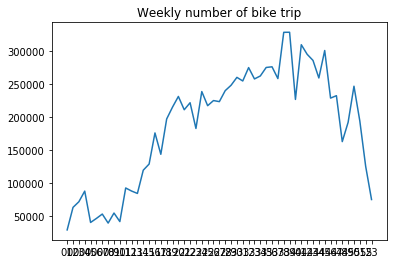

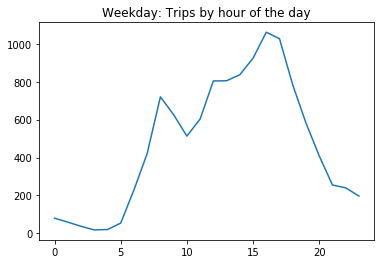

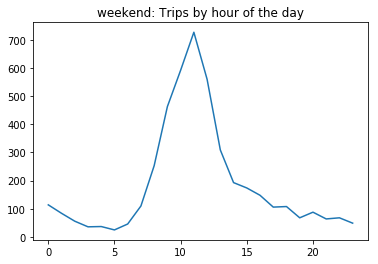

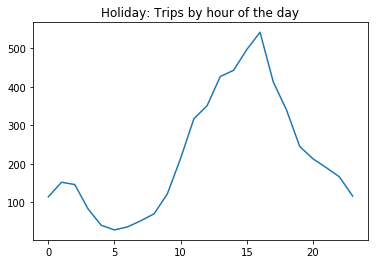

In [2]:
# write your code here
# (1) plot weekly number of bike trips
# Weekly number
weeklyNum = data.groupby("Week").size()
plt.title("Weekly number of bike trip")
plt.plot(weeklyNum)
plt.show()

# (2) select three typical days: one weekday, one weekend and one holiday; plot trips by hour of the day.
# One Weekday
weekday = data[(data["Month"] == "01") & (data["Day"] == "02")]
weekdayHour = weekday.groupby("Hour").size()
plt.title("Weekday: Trips by hour of the day")
plt.plot(weekdayHour)
plt.show()

# One weekend
weekend = data[(data["Month"] == "01") & (data["Day"] == "03")]
weekendHour = weekend.groupby("Hour").size()
plt.title("weekend: Trips by hour of the day")
plt.plot(weekendHour)
plt.show()

# One holiday
holiday = data[(data["Month"] == "01") & (data["Day"] == "01")]
holidayHour = holiday.groupby("Hour").size()
plt.title("Holiday: Trips by hour of the day")
plt.plot(holidayHour)
plt.show()

########################################################################################
########################################################################################

# Comments: 
# Weekly trend and Weekday hourly trend is the similary, first increase and then decrease
# Different patterns were seen in weekday vs. weekend and holiday
# Duering weekday, usage of bikes surged from 9am and peaked at 4pm, which reflect the office hours.  
# However, Weekend Hourly trend reeach its peak after 10, while Holiday hourly trend reaches it peak after 15

## 3. Bike Trips vs Station 

For a bike share system, one of the issue is make sure that there are bikes available at stations where people want to pick them up. If station $A$ starts the day with lots of bikes, but people take them out to other stations and nobody returns any bikes to $A$, then it will run out of bikes, and that's the thing we don't want. Now, let's think about the transition of bikes between stations and locate which stations would be more likely to suffer bike outage or overage? In order to narrow down the list of stations, we

(1) select top 50 most popular stations; 

(2) locate top 5 stations which are most likely to suffer daily bike outage.

(3) locate top 5 stations which are most likely to have daily bike overage. 

In [17]:
# filter stations

# (1) select top 50 most popular stations;
numOut = pd.DataFrame(data["start station name"].value_counts())
numIn = pd.DataFrame(data["end station name"].value_counts())
total = pd.concat([numOut,numIn], axis = 1)
total["total"] = total.sum(axis = 1)
total.columns= ("Number of bikes Out","Number of bikes In","Total Number of Vists")
total = total.sort_values(by = "Total Number of Vists", ascending = False)
top50Station = total.head(50)
top50Station = total.index.get_values()
print("top 50 most popular stations: ")
print()
for i in top50Station:
    print(i)



# (2) locate top 5 stations which are most likely to suffer daily bike outage (if any)
dailyStart = data.groupby(["Month","Day"])["start station name"].value_counts() *(-1)
dailyEnd = data.groupby(["Month","Day"])["end station name"].value_counts()
dailySum = pd.concat([dailyStart,dailyEnd], axis = 1)
dailySum["Sum"] = dailySum["start station name"] + dailySum["end station name"]
dailySum['Outage'] = dailySum['Sum'].apply(lambda x: 1 if x < 0 else 0)
dailySum['Overage'] = dailySum['Sum'].apply(lambda x: 1 if x > 0 else 0)
outage = dailySum.groupby(level = 2)["Outage"].sum()
overage = dailySum.groupby(level = 2)["Overage"].sum()
outage = outage.sort_values(ascending=False)
outage5 = outage.head(5).index.get_values()
print()
print("Top 5 stations which are most likely to suffer daily bike outage: ")
print()
for i in outage5:
    print(i)


# (3) locate top 5 stations which are most likely to have daily bike overage (if any)
overage = overage.sort_values(ascending=False)
overage5 = overage.head(5).index.get_values()
print()
print("Top 5 stations which are most likely to suffer daily bike overage: ")
print()
for i in overage5:
    print(i)



top 50 most popular stations: 

Pershing Square North
Lafayette St & E 8 St
8 Ave & W 31 St
E 17 St & Broadway
W 21 St & 6 Ave
West St & Chambers St
Broadway & E 14 St
Cleveland Pl & Spring St
Greenwich Ave & 8 Ave
Broadway & E 22 St
W 41 St & 8 Ave
Carmine St & 6 Ave
Vesey Pl & River Terrace
W 20 St & 11 Ave
8 Ave & W 33 St
Broadway & W 60 St
Christopher St & Greenwich St
Broadway & W 24 St
Lafayette St & Jersey St
University Pl & E 14 St
Lexington Ave & E 24 St
Barrow St & Hudson St
W 31 St & 7 Ave
Central Park S & 6 Ave
Centre St & Chambers St
W 18 St & 6 Ave
12 Ave & W 40 St
W 42 St & 8 Ave
W 24 St & 7 Ave
W 38 St & 8 Ave
Barclay St & Church St
1 Ave & E 15 St
W 33 St & 7 Ave
W 22 St & 10 Ave
Grand Army Plaza & Central Park S
E 7 St & Avenue A
South End Ave & Liberty St
Washington St & Gansevoort St
E 32 St & Park Ave
W 27 St & 7 Ave
9 Ave & W 22 St
E 39 St & 2 Ave
6 Ave & W 33 St
Mercer St & Bleecker St
W 26 St & 8 Ave
Greenwich St & Warren St
E 10 St & Avenue A
W 4 St & 7 Ave S
W

## 4. Bike "magical" transports 

In order to balance available bikes in every sation, the bike share operator could transport additional bikes to station $A$ to meet demand, but that cost extra time/money. Could you use the data to measure how often bikes "magically" transport from one station to another, even though no one took a ride?

We take each bike drop off station and calculated the percentage of rides where the bike's next trip started at a different station from where the previous trip dropped off. Summarize the "magical" transports percentage for every month in a year.

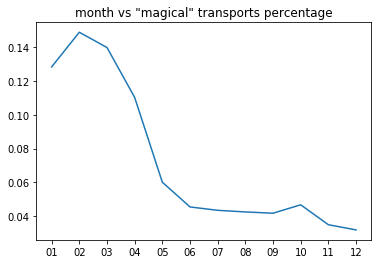

In [4]:
# write your code here
bikeID = set(data.bikeid.unique())
magicalTime = pd.DataFrame()

for i in bikeID:
    start = data[["start station name","starttime"]][data["bikeid"] == i]
    start = start.sort_values(by = "starttime", ascending = True)
    start = start.iloc[1:]
    start = start.reset_index(drop = True)
    end = data[["end station name","starttime"]][data["bikeid"] == i]
    end = end.sort_values(by = "starttime", ascending = True)
    end = end.iloc[:-1]
    end = end.reset_index(drop = True)
    diff1 = np.where(start["start station name"] != end["end station name"])
    diff = diff1[0]
    magicalTimeTemp = start["starttime"][start.index.isin(diff)]
    magicalTime = pd.concat([magicalTime,magicalTimeTemp], axis = 0)
    
magicalTime.columns = (["starttime"])
magicalTime["month"] = magicalTime["starttime"].apply(lambda x:x.strftime("%m"))

monthlyMagical = magicalTime["month"].value_counts()
monthlyTotal = data["Month"].value_counts()

percentage = monthlyMagical / monthlyTotal

plt.plot(percentage)
plt.title('month vs "magical" transports percentage')
plt.show()


# include your plot: month vs "magical" transports percentage

########################################################################################
########################################################################################
# add your comments
# Comment: 
# Overall, the percentage has a decreased trend. It decreases over the time.
# The highest "magical" transports percentage ocurrs at second month (Februray). 

After investigate how Citi Bike operates the bike share system, now let's focus on bike share users behavior. 

## 5. User type 

There are mainly two type of customers, "Customer" indicates people with 24-hour pass or 3-day pass. "Subscriber" is annual member. 

(1) for "Subscriber", we assessed whether there is any distribution difference in age for female user and male user?

(2) for "Customer", do they prefer to take short duration trips than "Subscriber"? 

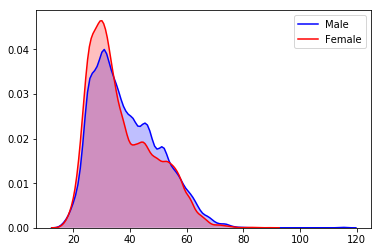

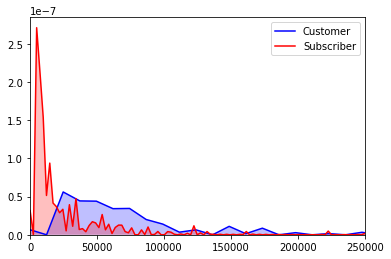

In [5]:
# write your code
import seaborn as sns
# (1) for "Subscriber", could you tell if there is any distribution difference in age for female user and male user?
subscriber= data[data["usertype"] == "Subscriber"].dropna()
subscriber["age"] = subscriber["birth year"].map(lambda x: 2015 - x)
subscriber["not outlier"] = subscriber[["age","gender"]].groupby("gender").transform(\
          lambda group: abs((group - group.mean()).div(group.std())) < 2*group.std())
subscriberMage = subscriber[(subscriber["gender"] == 1) & (subscriber["not outlier"])]["age"]
subscriberWage = subscriber[(subscriber["gender"] == 2) & (subscriber["not outlier"])]["age"]

# Random sampling from each group
subscriberMS = subscriberMage.sample(100000)
subscriberWS = subscriberWage.sample(100000)

# Plots distribution for each group
sns.kdeplot(subscriberMS, shade = True, color = "b", label="Male")
sns.kdeplot(subscriberWS, shade = True, color = "r", label="Female")
plt.title("Age Distribution")
plt.show()

# (2) for "Customer", do you think they prefer to take short duration trips than "Subscriber"? (plot the distribution of "tripduration" for both "Subscriber" and "Customer").
tripDuration = data[["tripduration","usertype"]].copy()
tripDuration["not outlier"] = tripDuration[["tripduration","usertype"]].groupby("usertype").transform(\
          lambda group: abs((group - group.mean()).div(group.std())) < 2*group.std())

tripDurationC = tripDuration[(tripDuration["not outlier"]) &(tripDuration["usertype"] == "Customer")]
tripDurationS = tripDuration[(tripDuration["not outlier"]) &(tripDuration["usertype"] == "Subscriber")]

# Random sampling from each group
tripDurationCS = tripDurationC.sample(100000)
tripDurationSS = tripDurationS.sample(100000)

# Plots distribution for each group
plt.xlim(0,100000)
sns.kdeplot(tripDurationCS["tripduration"], shade = True, color = "b", label="Customer")
sns.kdeplot(tripDurationSS["tripduration"], shade = True, color = "r", label="Subscriber")
plt.title("Trip Duration  Distribution")
plt.show()


# list your plots

########################################################################################
########################################################################################
# Comment: 
# (1) for "Subscriber", The distribution in age for female user and male user is really close.
# Female age distribution Skewed more right compared with male.

# (2) for "Customer", Customer tend to have a longer trip duration compared with subscriber.

## 6. Daily Bike demand 

We assessed the potential factors that might affect the daily bike demand. We identified the factors which is the most relevant and find external driver to support your statement. We calculated the correlation (78%) between the driver (tempreture) and the bike demand.



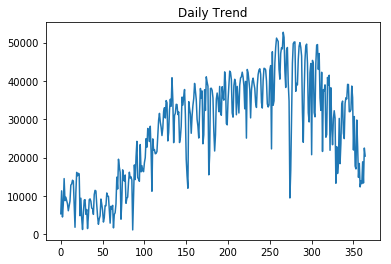

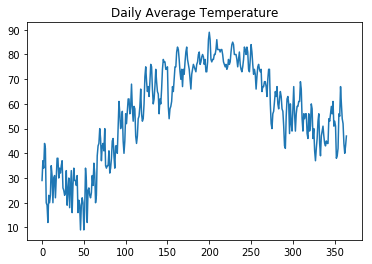

The correlation bewteen daily trend and dialy average temperature: 0.7751992461532946


In [6]:
# provide external data source
# https://www.climate.gov/maps-data/dataset/daily-temperature-and-precipitation-reports-data-tables
# The external source is on daily average temperature in New york city. I believe it will impact the
# daily trend of bike demand.
dailyTrend = data.groupby(["Month","Day"]).size()
dailyTrend = dailyTrend.reset_index()
dailyTrend.columns = ("Month","Day", "Total")

temperature = pd.read_csv("weather.csv")

plt.plot(dailyTrend["Total"])
plt.title("Daily Trend")
plt.show()

plt.plot(temperature["TAVG"])
plt.title("Daily Average Temperature")
plt.show()

cor = dailyTrend["Total"].corr(temperature["TAVG"])
print("The correlation bewteen daily trend and dialy average temperature: ", end = "")
print(cor)

########################################################################################
########################################################################################
# The daily average temperature has a strong correlation with daily bike demand. Therefore,
# The daily average temperature impact the daily bike demand. 
# make the plot or calculate the correlation


## 7. Hot route 

For simplicity, we assume users pick up the bike from station $A$ and ride directly towards another station $B$ and return bike there. 

(1) We counted how many trips between any two stations $A$ and $B$ ($A\not = B$) and listed top 10 routes with largest trip number

(2) We assessed whether the bike speed will be affected by traffic during rush hours on weekday. 

Rush hours are 7am-10am and 5pm-8pm. 

In [14]:
# (1)
from haversine import haversine
# write your code
stations = data[data["start station name"] != data["end station name"]][["start station name","end station name"]]
def beset(row):
    s = set([row["start station name"],row["end station name"]])
    return s
stations["Stations"] = stations.apply(beset, axis = 1)
stations["Station1"] = stations["Stations"].apply(lambda x: list(x)[0])
stations["Station2"] = stations["Stations"].apply(lambda x: list(x)[1])
route = stations[["Station1","Station2"]]
route = route.groupby(["Station1","Station2"]).size()
route = route.reset_index()
route.columns = ("Station1","Station2","Total")
route = route.sort_values(by = "Total", ascending = False)
route = route.reset_index(drop = True)
# list selected top 10 routes
route10 = route.sort_values(by = "Total", ascending = False).head(10)
print(route10)


routeStation1 = route.iloc[0]["Station1"]
routeStation2 = route.iloc[0]["Station2"]
rush = data[((data["start station name"] == routeStation1) & (data["end station name"] == routeStation2))\
            |((data["start station name"] == routeStation2) & (data["end station name"] == routeStation1))]
rush = rush[(rush["Weekday"] == True) & (rush["Holiday"] == False)] 
rush = rush[((rush["Hour"] >=7) & (rush["Hour"] <= 10)) |((rush["Hour"] >=17) & (rush["Hour"] <=20))]

nonRush = data[((data["start station name"] == routeStation1) & (data["end station name"] == routeStation2))\
            |((data["start station name"] == routeStation2) & (data["end station name"] == routeStation1))]
nonRush = nonRush[(nonRush["Weekday"] == True) & (nonRush["Holiday"] == False)] 
nonRush = nonRush[(nonRush["Hour"] <=7) | ((nonRush["Hour"] > 10) & (nonRush["Hour"] <17)) | (nonRush["Hour"] >20)]

lon1 = rush.iloc[0]["start station longitude"]
lat1 = rush.iloc[0]["start station latitude"]
lon2 = rush.iloc[0]["end station longitude"]
lat2 = rush.iloc[0]["end station latitude"]
distance = haversine((lat1,lon1),(lat2,lon2), miles = True)
rush["speed"] = rush["tripduration"].map(lambda x: distance / (x/3600))
nonRush["speed"] = nonRush["tripduration"].map(lambda x: distance / (x/3600))
rushHourspeed = rush["speed"].mean()
nonrushHourspeed = nonRush["speed"].mean()

# write down the route you picked
print()
print("Route: ",routeStation1,routeStation2)
# write the code and list non-rush-hour speed and rush-hour speed
print()
print("rush Hour speed: ",rushHourspeed)
print("non rush Hour speed: ",nonrushHourspeed)

########################################################################################
########################################################################################
# (2) : The bike speed will be affected by traffic during rush hours on weekday.
# The average rush hour bike speed tend to be higher than the average non rush hour bike speed. 

                            Station1                           Station2  Total
0                   12 Ave & W 40 St              West St & Chambers St   7393
1                    W 21 St & 6 Ave                    9 Ave & W 22 St   6532
2                  E 7 St & Avenue A              Lafayette St & E 8 St   6114
3  Grand Army Plaza & Central Park S                 Broadway & W 60 St   5750
4           Vesey Pl & River Terrace          Greenwich St & N Moore St   5699
5                    W 26 St & 8 Ave                   11 Ave & W 27 St   5695
6             Central Park S & 6 Ave  Grand Army Plaza & Central Park S   5633
7                 E 10 St & Avenue A              Lafayette St & E 8 St   5574
8           Vesey Pl & River Terrace                     West Thames St   5504
9                    W 21 St & 6 Ave                   W 22 St & 10 Ave   5422

Route:  12 Ave & W 40 St West St & Chambers St

rush Hour speed:  8.646450671661254
non rush Hour speed:  8.073460799232205


## 8. Bike speed 

We further assessed whether the gender and age impact biking speed?

We segmented by

(a) Weekday, excluding holidays; (b) Rush hour; (c) Annual subscribers; (d) Average trip speed between 4 and 35 miles per hour. 


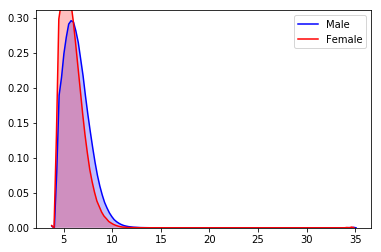

correlation between age and speed:  -0.117063220964


In [12]:
# write your code
import seaborn as sns
# subset of trips: (a) Weekday, excluding holidays; (b) Rush hour; (c) Annual subscribers;
# Subscriber1: not drop Nan in birth year
subscriber1 = data[data["usertype"] == "Subscriber"]
subscriber1 = subscriber1[(subscriber1["Weekday"] == True )& (subscriber1["Holiday"] == False)]
subscriber1 = subscriber1[((subscriber1["Hour"] >=7) & (subscriber1["Hour"] <= 10)) \
                    |((subscriber1["Hour"] >=17) & (subscriber1["Hour"] <=20))]

# Function to calculate the speed
def getSpeed1 (row):
    lon1 = row["start station longitude"]
    lat1 = row["start station latitude"]
    lon2 = row["end station longitude"]
    lat2 = row["end station latitude"]
    distance = haversine((lat1,lon1),(lat2,lon2), miles = True)
    time = row["tripduration"] / 3600
    speed = distance / time
    return speed

# Obtain the speed 
subscriber1["speed"] = subscriber1.apply(getSpeed1, axis = 1)

# Extract and split into two groups: male and female
dataM = subscriber1[subscriber1["gender"] == 1]
dataW = subscriber1[subscriber1["gender"] == 2]

# Further step: subset of trips: Average trip speed between 4 and 35 miles per hour
dataM = dataM[(dataM["speed"] >= 4) & (dataM["speed"] <= 35)]
dataW = dataW[(dataW["speed"] >= 4) & (dataW["speed"] <= 35)]

sns.kdeplot(dataM["speed"], shade = True, color = "b", label="Male")
sns.kdeplot(dataW["speed"], shade = True, color = "r", label="Female")
plt.show()

# Drop rows with Nan in birth year
subscriber1 = subscriber1[np.isnan(subscriber1["birth year"]) == False]
subscriber1["age"] = 2015 - subscriber1["birth year"]
cor = subscriber1["age"].corr(subscriber1["speed"])
print("correlation between age and speed: ",cor)

########################################################################################
########################################################################################
# state your result
# Male tend to ride faster than the Female
# Older tend to ride the bike slower than the younger according to the correlation between age and speed.

## 9. Car or Bike? Which faster in NYC? 

The car trip data file contains data with ride start and end locations (specified as latitudes and longitudes), start timestamps in epoch seconds, and trip duration in seconds. Each line is a trip and has the following format: 

row_id, start_lng, start_lat, end_lng, end_lat, start_timestamp, duration


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


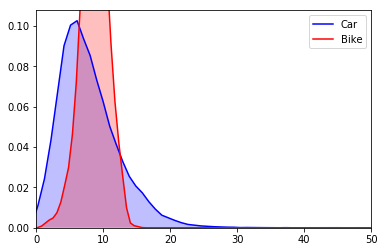

In [9]:
# write your conclusion
carData = pd.read_csv("car_trip.csv")

# Transform starttime and stoptime into right datetime format
carData["start_timestamp"] = carData["start_timestamp"].map(lambda x: \
       datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
carData["start_timestamp"] = carData["start_timestamp"].map(lambda x:\
       np.datetime64(datetime.strptime(x, "%Y-%m-%d %H:%M:%S")))

# Function to calculate the speed
def getSpeed2 (row):
    lon1 = row["start_lng"]
    lat1 = row["start_lat"]
    lon2 = row["end_lng"]
    lat2 = row["end_lat"]
    distance = haversine((lat1,lon1),(lat2,lon2), miles = True)
    time = row["duration"] / 3600
    speed = distance / time
    return speed

# Location information is not in a good format. Function: test if information can be converted into float
def is_float(num):
  try:
    num = float(num)
  except ValueError:
    return False
  return True

# Similar with Q1, add varibles 
carData["Hour"] = carData["start_timestamp"].map(lambda x:int(x.strftime("%H")))


# Omit data with bad location information format that cannot be converted into float directly
carData["TF1"] = carData["start_lat"].map(is_float)
carData["TF2"] = carData["end_lat"].map(is_float)
carData = carData[carData["TF1"] & carData["TF2"]]

# Convert location information into float
carData["start_lng"] = carData["start_lng"].map(lambda x: float(x))
carData["end_lng"] = carData["end_lng"].map(lambda x: float(x))
carData["start_lat"] = carData["start_lat"].map(lambda x: float(x))
carData["end_lat"] = carData["end_lat"].map(lambda x: float(x))

carData["speed"] = carData.apply(getSpeed2, axis = 1)


carData["Weekday"] = carData["start_timestamp"].map(lambda x:x.weekday() in range(1,6))

carData["Weekend"] = carData["start_timestamp"].map(lambda x:x.weekday() not in range(1,6))

carData["Holiday"] = carData["start_timestamp"].map(lambda x:np.datetime64(x.strftime("%Y-%m-%d")))
carData["Holiday"] = carData["Holiday"].isin(USFederalHolidayCalendar().holidays())

routeStation1 = route.iloc[0]["Station1"]
routeStation2 = route.iloc[0]["Station2"]
# Select one route that is similar to one of the popluar bike route
location = data[((data["start station name"] == routeStation1) & (data["end station name"] == routeStation2))\
            |((data["start station name"] == routeStation2) & (data["end station name"] == routeStation1))]

lat1 = location.iloc[0]["start station latitude"]
lon1 = location.iloc[0]["start station longitude"]

lon2 = location.iloc[0]["end station longitude"]
lat2 = location.iloc[0]["end station latitude"]


# weekday and rush hour
carRush = carData[(carData["Weekday"] == True) & (carData["Holiday"] == False)\
                  & (((carData["Hour"] >=7) & (carData["Hour"] <= 10)|\
                      ((carData["Hour"] >=17) & (carData["Hour"] <=20))))]
# One route
carRush1 = carRush[((abs(carRush["start_lat"] - lat1) <= 0.01) & \
                    (abs(carRush["start_lng"] - lon1) <= 0.01))| \
                    ((abs(carRush["start_lat"] - lat2) <= 0.01) & \
                    (abs(carRush["start_lng"] - lon2) <= 0.01))]

carRush1 = carRush1[((abs(carRush1["end_lat"] - lat1) <= 0.01) & \
                    (abs(carRush1["end_lng"] - lon1) <= 0.01))| \
                    ((abs(carRush1["end_lat"] - lat2) <= 0.01) & \
                    (abs(carRush1["end_lng"] - lon2) <= 0.01))]
# provide evidence
plt.xlim(0,50)
sns.kdeplot(carRush1["speed"], shade = True, color = "b", label="Car")
sns.kdeplot(rush["speed"], shade = True, color = "r", label="Bike")
plt.show()

########################################################################################
########################################################################################
# For the speed that is less than 20 MPH, More likely, Bike tend to have a higher speed than cars 
# in a popluar route i chose during the rush hour. 
# 

